# Train the first Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from preamble import *
import mglearn
%matplotlib notebook

from scipy import sparse

In [2]:
p0 = np.arange(4)
print("A numpy arange:\n%s" % p0)

eye = np.eye(4)
print("Sparse Matrix\n{}".format(eye))

s = sparse.csc_matrix(eye)
print("Scipy sparse CSR matrix:\n{}".format(s))

d = [4,5,2,1]

r = [1,3,9,12]
c = [4,5,7,10]

coo = sparse.coo_matrix((d,(r,c)))
print("My coo matrix:\n%s" % coo)

A numpy arange:
[0 1 2 3]
Sparse Matrix
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
Scipy sparse CSR matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
My coo matrix:
  (1, 4)	4
  (3, 5)	5
  (9, 7)	2
  (12, 10)	1


## Get the data and look at it

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [4]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
print(iris_dataset['DESCR'][:193])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att


In [6]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [7]:
iris_dataset['target_names'][:10]

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [8]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris_dataset['data'][:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [10]:
type(iris_dataset['data'])

numpy.ndarray

In [11]:
iris_dataset['data'].shape

(150, 4)

In [12]:
type(iris_dataset['target'])

numpy.ndarray

In [13]:
iris_dataset['target'].shape

(150,)

In [14]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'],iris_dataset['target'], random_state=0)

In [16]:
print("X_train.shape: " + str(X_train.shape))
print("y_train.shape: " + str(y_train.shape))

print("X_test.shape: " + str(X_test.shape))
print("y_test.shape: " + str(y_test.shape))

X_train.shape: (112, 4)
y_train.shape: (112,)
X_test.shape: (38, 4)
y_test.shape: (38,)


In [17]:
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


### Pair Plot the Data

Create a dataframe from data in X_train and label the columns with the feature_names.

Than scatter plot the data colored by y_train.

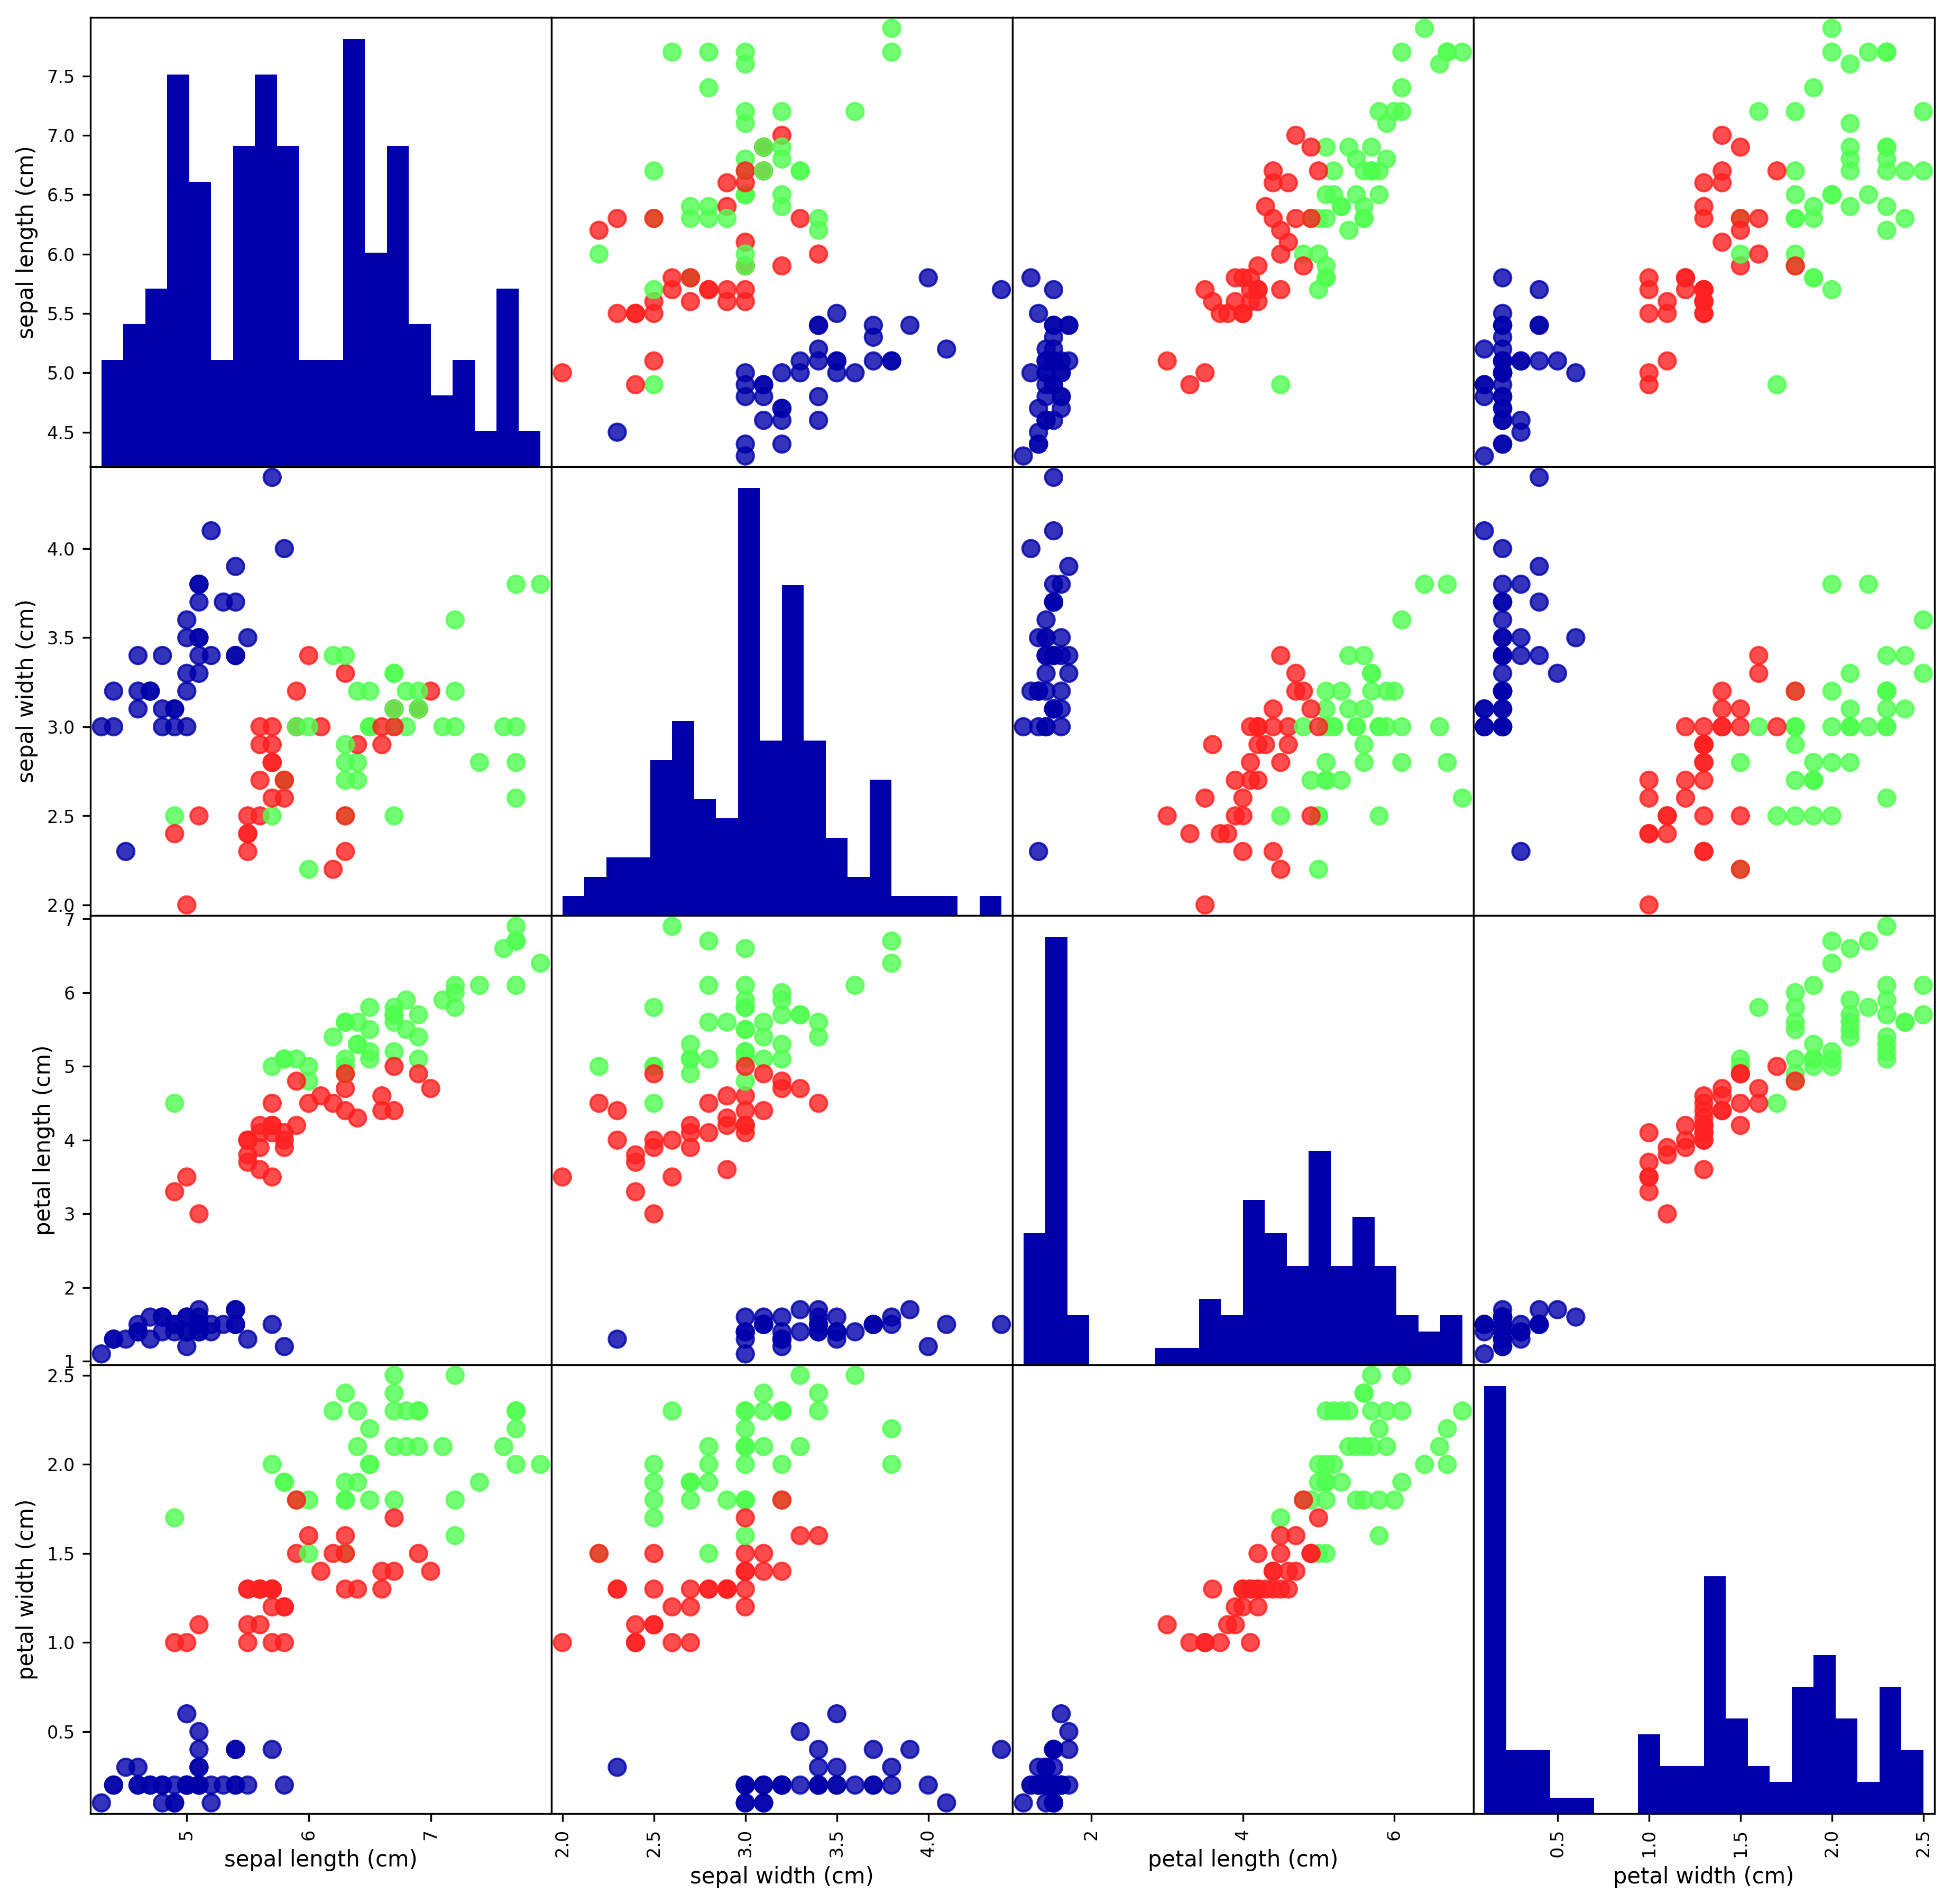

In [18]:
import pandas as pd
from preamble import *
%matplotlib inline

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset['feature_names'])

grr = pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), 
                       marker='o', hist_kwds={'bins': 20}, s=60, alpha=0.8,
                       cmap=mglearn.cm3)

### Train the k-nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [21]:
knn.kneighbors_graph()

<112x112 sparse matrix of type '<class 'numpy.float64'>'
	with 112 stored elements in Compressed Sparse Row format>

In [22]:
X_new = np.array([[5.0,2.9,1,0.2]])
X_new.shape

(1, 4)

In [23]:
prediction = knn.predict(X_new)
print(prediction)
print(iris_dataset['target_names'][prediction])

[0]
['setosa']


In [24]:
print(iris_dataset['target_names'][knn.predict(np.array([[5.0,2.9,4.0,1.5]]))])
print(iris_dataset['target_names'][knn.predict(np.array([[6.5,1.9,5.0,1.5]]))])
print(iris_dataset['target_names'][knn.predict(np.array([[4.5,2.9,1.3,0.5]]))])

['versicolor']
['virginica']
['setosa']


## Test the Model

In [25]:
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [26]:
print("score %.2f" % np.mean(y_pred == y_test))

score 0.97


In [27]:
print("score %.2f" % knn.score(X_test, y_test))

score 0.97


In [28]:
from collections import Counter
c = dict(Counter(y_test == y_pred))
print(c)

{True: 37, False: 1}
